In [1]:
print("""
FullName : Frank Evin Yami Ngassam
Student’s Number: 0232112159

Modelling and Analysis of Complex Networks
Assignment 3
Number of the dataset : 5
""")


FullName : Frank Evin Yami Ngassam
Student’s Number: 0232112159
      
Modelling and Analysis of Complex Networks
Assignment 3 
Number of the dataset : 5



PACKAGES AND DATA LOADING

In [2]:
import networkx as nx
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
# Correct URLs pointing to the raw files on GitHub
facebook_url = "https://raw.githubusercontent.com/1250326/exercise_complex_network/master/Datasets/Group5/Facebook-Ego/686.edges"
twitter_url = "https://raw.githubusercontent.com/1250326/exercise_complex_network/master/Datasets/Group5/Twitter-Ego/1435461.edges"

# Download the Facebook-Ego network file
urllib.request.urlretrieve(facebook_url, "facebook.edges")
# Load the Facebook-Ego network as an undirected graph
facebook_network = nx.read_edgelist("facebook.edges", nodetype=int)

# Download the Twitter-Ego network file
urllib.request.urlretrieve(twitter_url, "twitter.edges")
# Load the Twitter-Ego network as a directed graph
twitter_network = nx.read_edgelist("twitter.edges", nodetype=int, create_using=nx.DiGraph())

QUESTION A :  Generation of  graphs based on Watts-Strogatz Model.

Let's build a function that can generate Watts-strogatz graphs and plot the structures

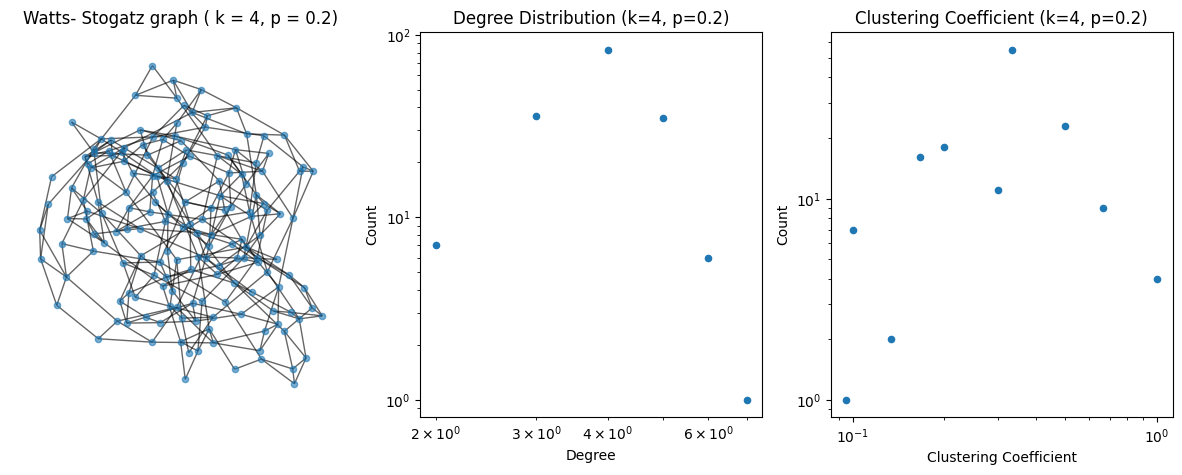

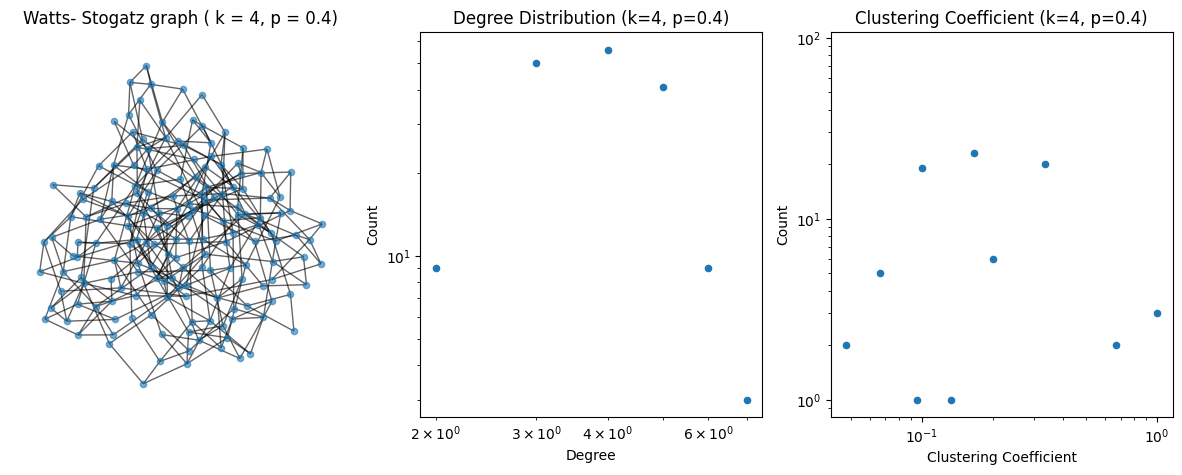

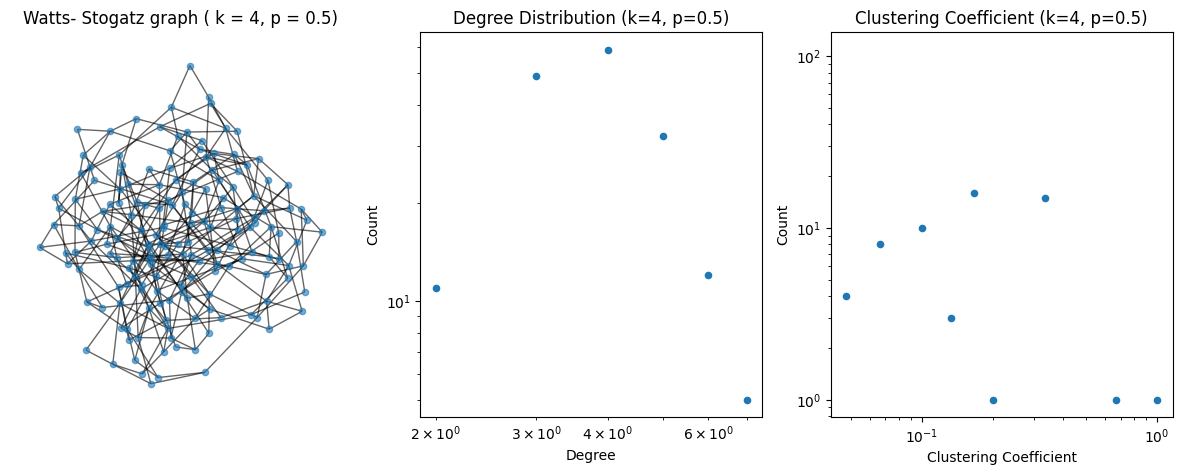

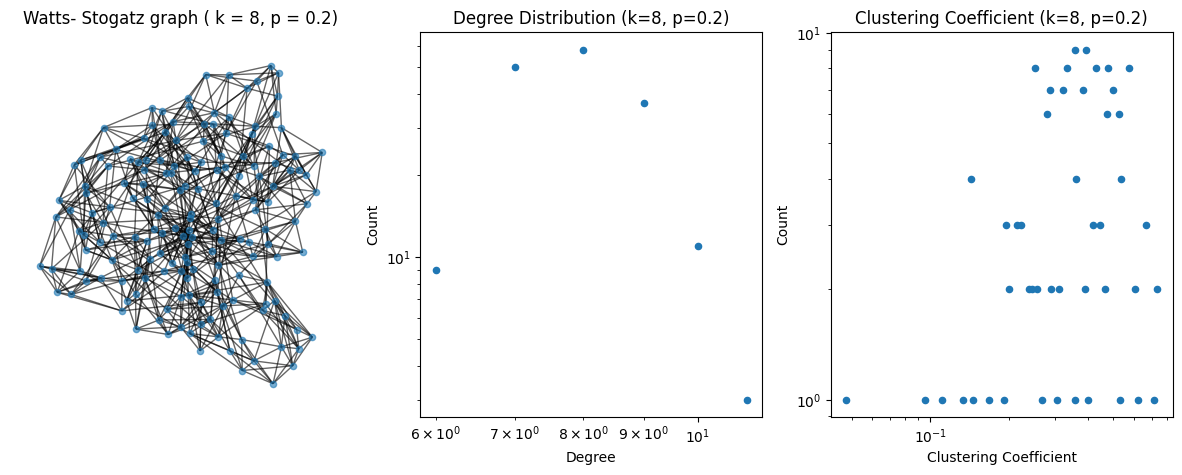

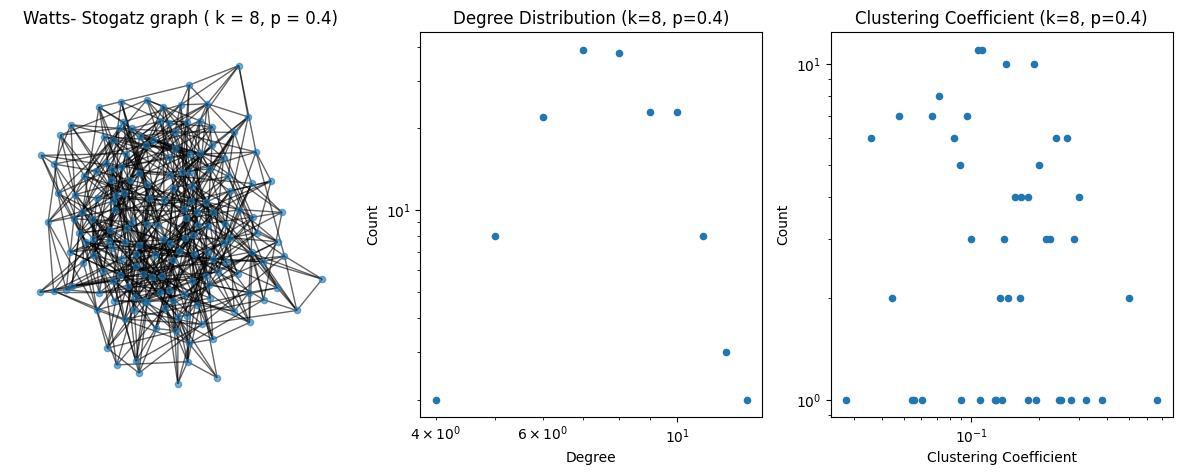

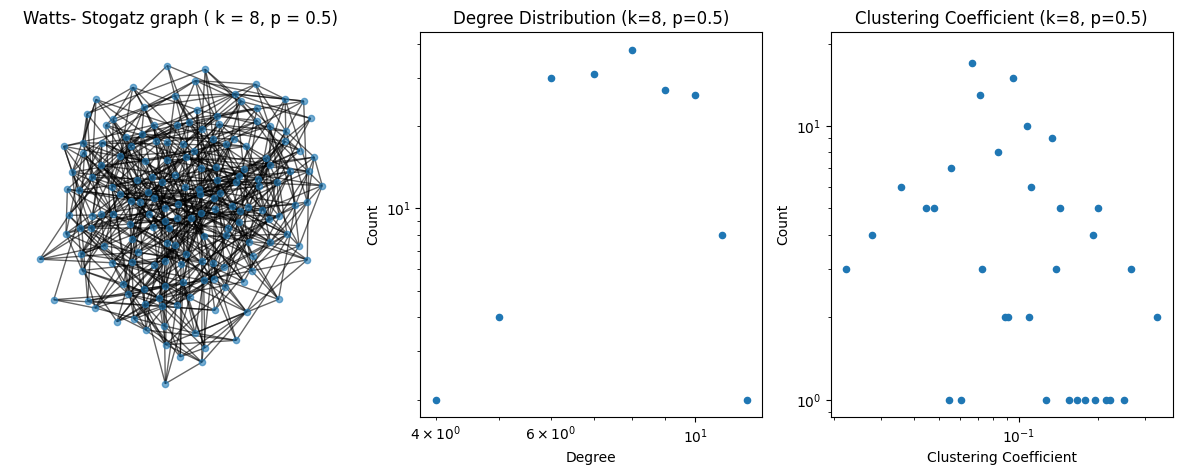

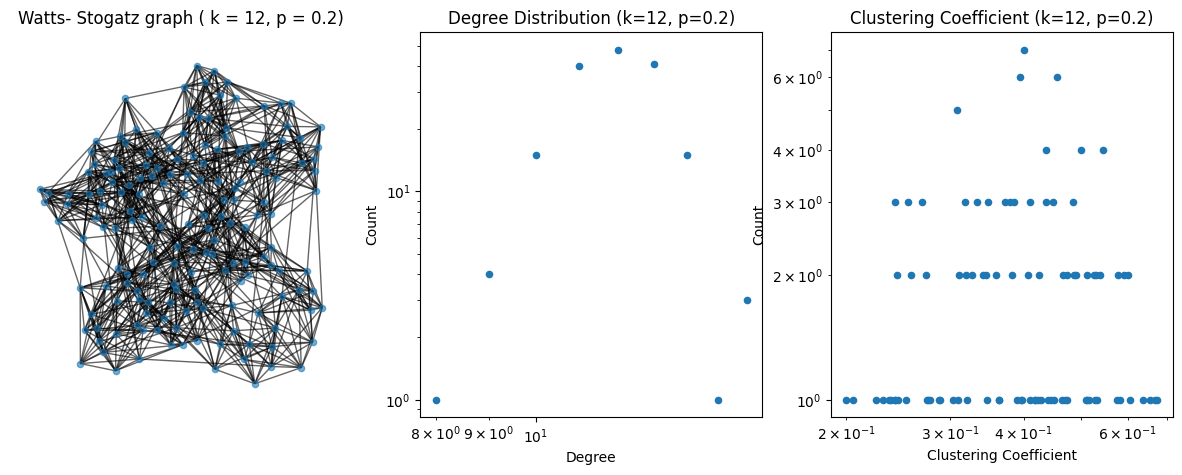

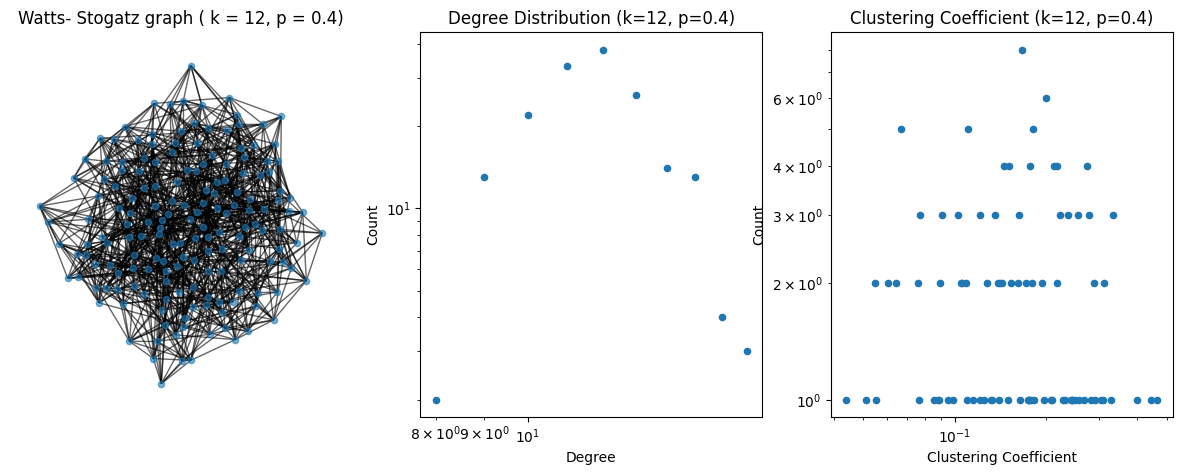

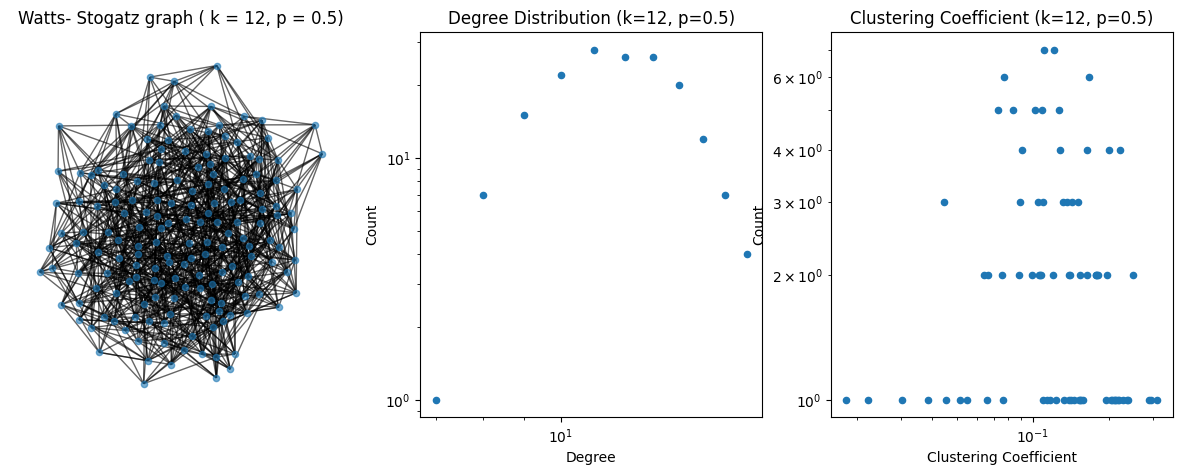

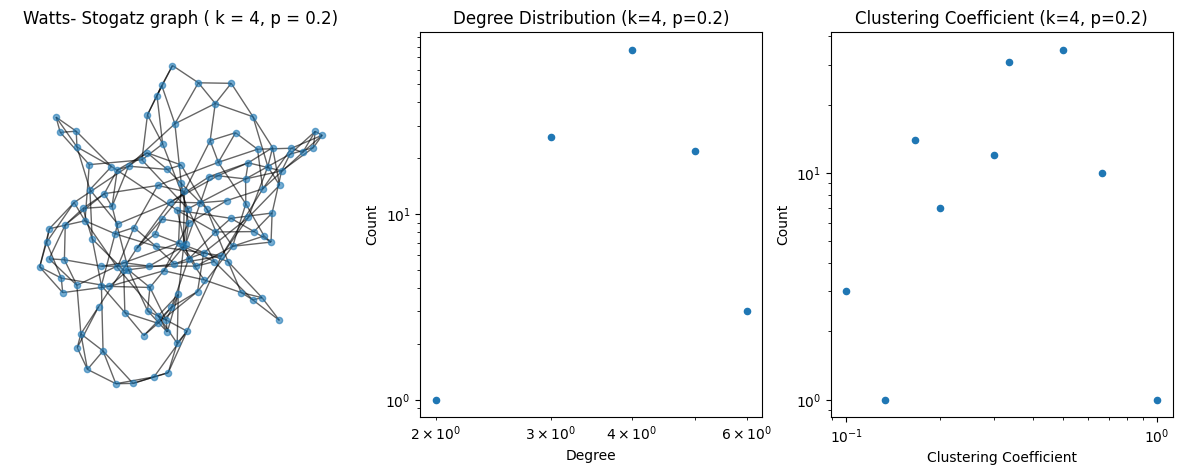

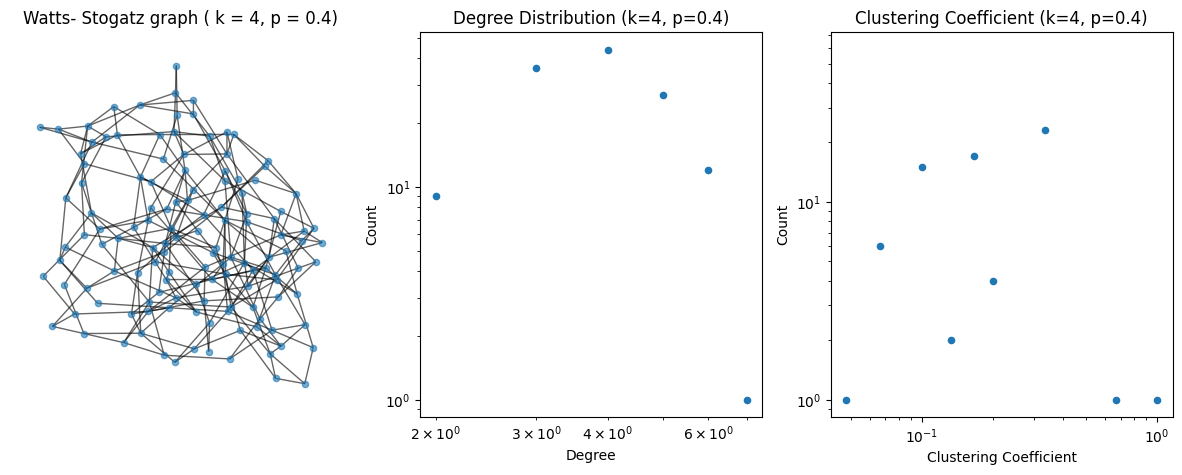

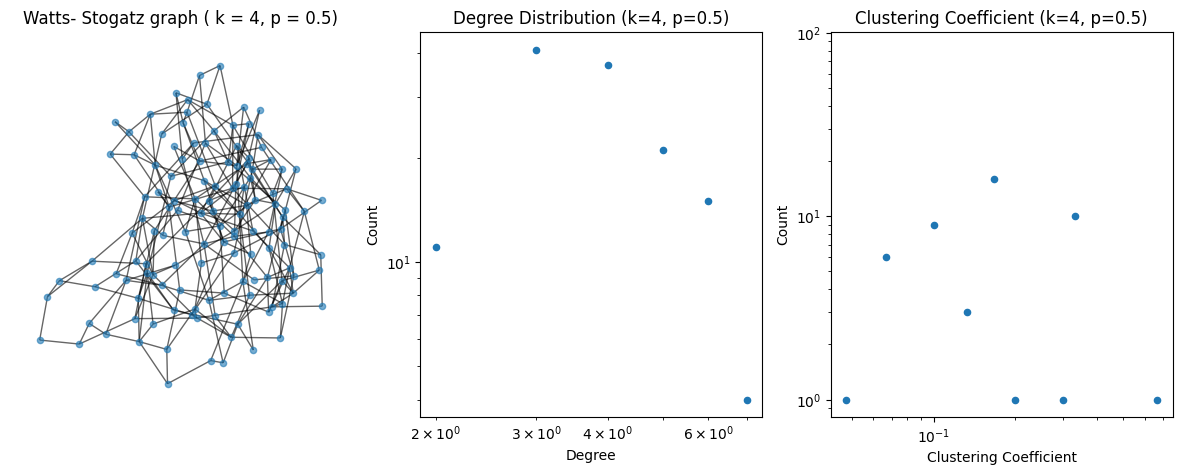

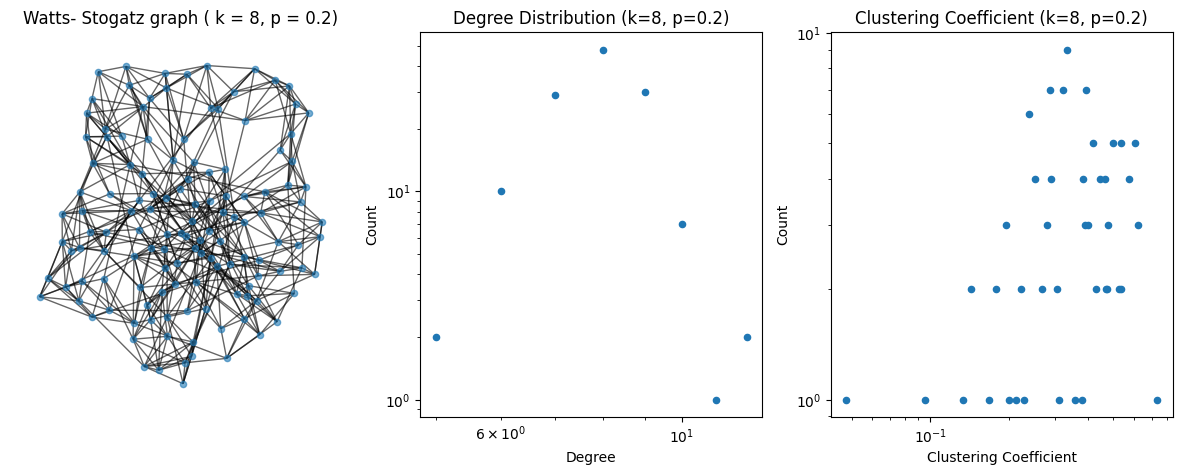

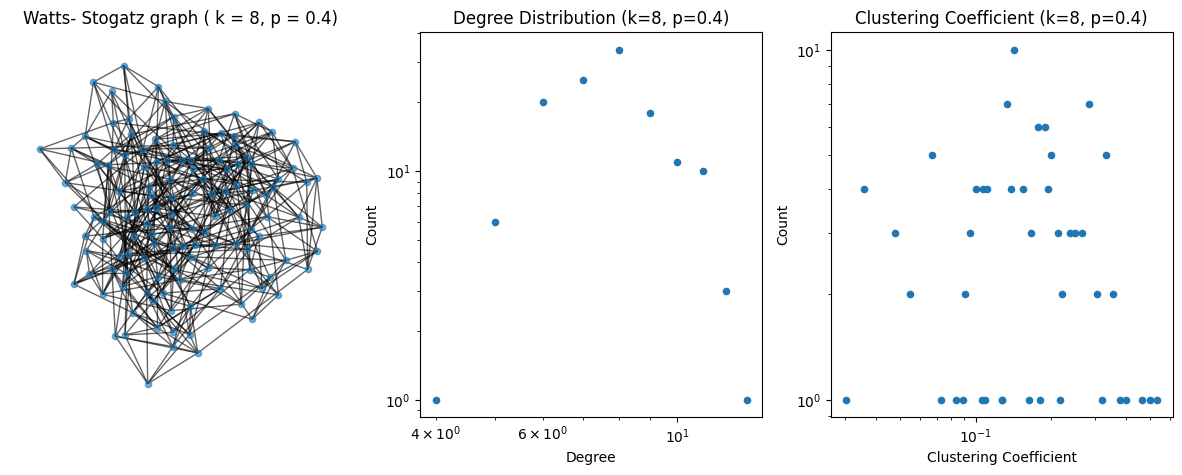

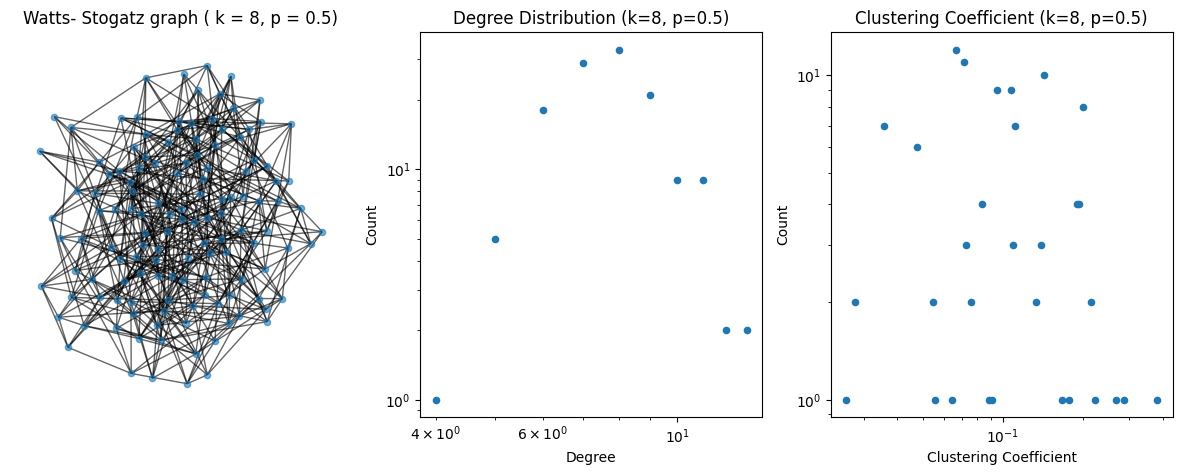

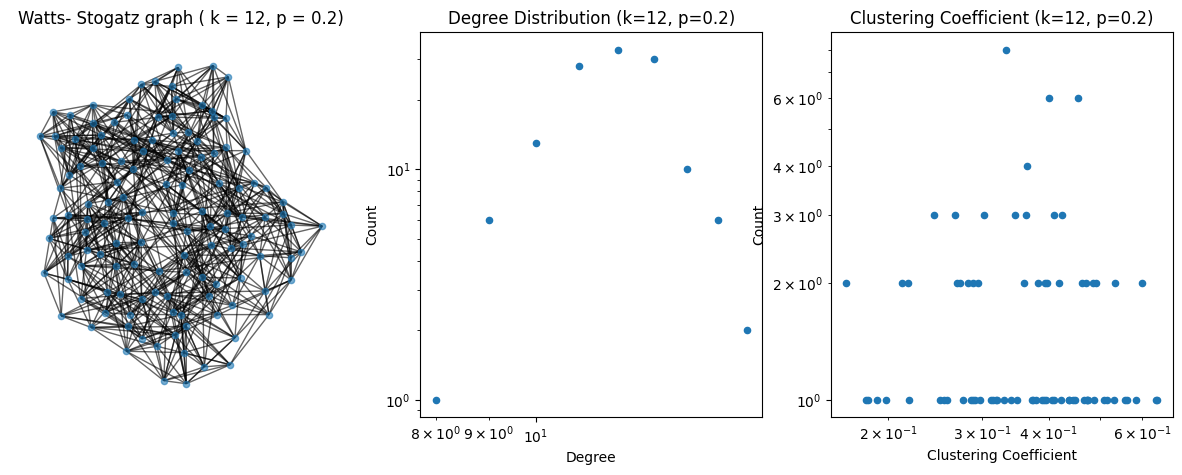

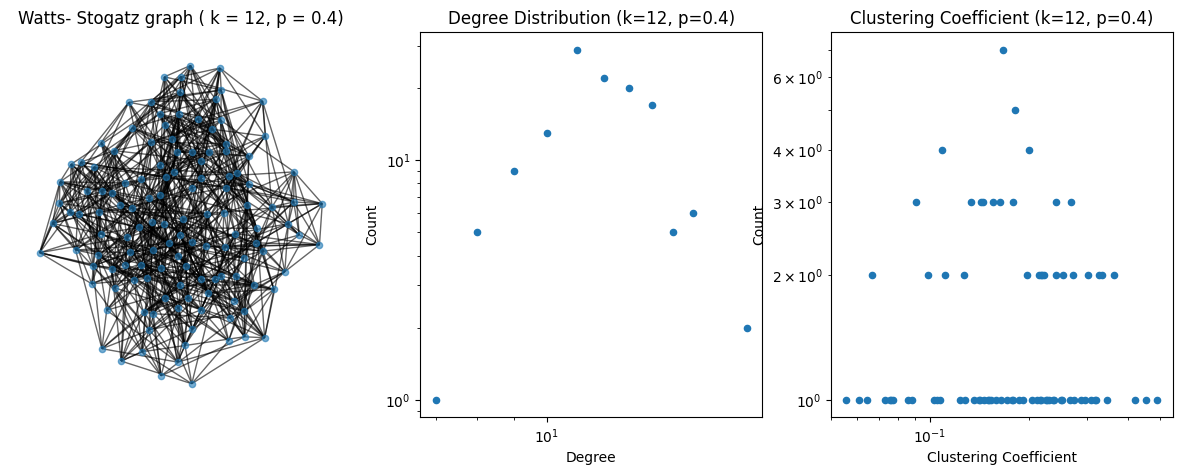

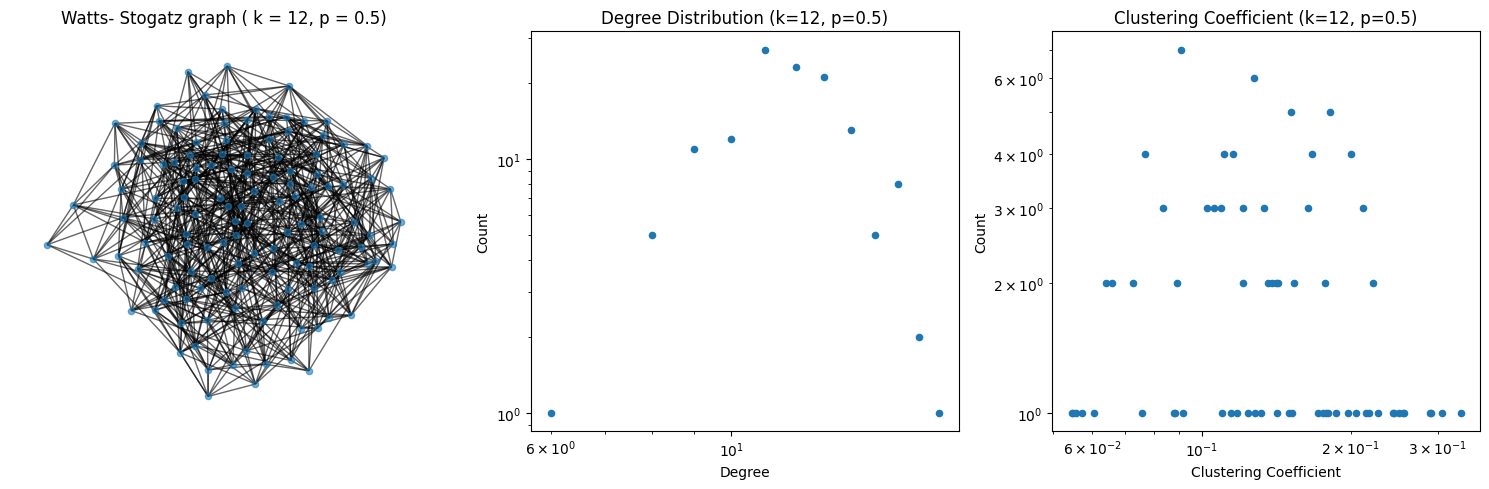

In [4]:
#Function
def generate_watts_strogatz_graph (num_nodes, k_values, p_values):
  for k in k_values:
    for  p in p_values:
      graph = nx.watts_strogatz_graph(num_nodes, k, p)

      #To plot the graph structure
      plt.figure(figsize = (15, 5))
      plt.subplot (131)
      nx.draw(graph, node_size = 20, with_labels = False, font_size = 8, alpha = 0.6)
      plt.title(f'Watts- Stogatz graph ( k = {k}, p = {p})', fontsize =12 )

      #To plot the degree distribution

      plt.subplot (132)
      degree_sequence = sorted([ d for n, d in graph.degree()]  ,reverse = True )
      degree_count = np.array (np.unique(degree_sequence, return_counts = True)).T
      plt.scatter(degree_count[:, 0], degree_count[:, 1], s=20)
      plt.title(f"Degree Distribution (k={k}, p={p})", fontsize=12)
      plt.xscale('log')
      plt.yscale('log')
      plt.xlabel("Degree", fontsize=10)
      plt.ylabel("Count", fontsize=10)

     # To plot the clustering coefficient
      plt.subplot(133)
      clustering_sequence = sorted(list(nx.clustering(graph).values()), reverse=True)
      clustering_count = np.array(np.unique(clustering_sequence, return_counts=True)).T
      plt.scatter(clustering_count[:, 0], clustering_count[:, 1], s=20)
      plt.title(f"Clustering Coefficient (k={k}, p={p})", fontsize=12)
      plt.xscale('log')
      plt.yscale('log')
      plt.xlabel("Clustering Coefficient", fontsize=10)
      plt.ylabel("Count", fontsize=10)

# To set the number of nodes in each graph
facebook_n = len(facebook_network.nodes())
twitter_n = len(twitter_network.nodes())

# To generate Watts-Strogatz graphs for Facebook-Ego network
generate_watts_strogatz_graph(facebook_n, [4, 8, 12], [0.2, 0.4, 0.5])

# To generate Watts-Strogatz graphs for Twitter-Ego network
generate_watts_strogatz_graph(twitter_n, [4, 8, 12], [0.2, 0.4, 0.5])

plt.tight_layout()
plt.show()

QUESTION B : Generation of  scale-free graphs and plot of structures.

degree distribution is  [[ 2 79]
 [ 3 45]
 [ 4 11]
 [ 5  9]
 [ 6  3]
 [ 7  3]
 [ 8  1]
 [ 9  2]
 [10  4]
 [11  4]
 [12  1]
 [13  2]
 [16  1]
 [21  1]
 [25  1]
 [33  1]]
degree distribution is  [[ 5 45]
 [ 6 29]
 [ 7 24]
 [ 8 15]
 [ 9 10]
 [10  3]
 [11  2]
 [12  6]
 [13  4]
 [14  4]
 [15  4]
 [16  2]
 [17  2]
 [18  1]
 [19  1]
 [20  6]
 [21  1]
 [25  1]
 [27  1]
 [28  1]
 [29  1]
 [35  1]
 [36  1]
 [37  1]
 [40  1]
 [60  1]]
degree distribution is  [[ 1  1]
 [10 19]
 [11 22]
 [12 14]
 [13 15]
 [14 15]
 [15 12]
 [16  5]
 [17  6]
 [18  5]
 [19  3]
 [20  8]
 [21  4]
 [22  1]
 [23  3]
 [24  5]
 [26  1]
 [27  1]
 [28  2]
 [29  1]
 [30  1]
 [31  2]
 [32  1]
 [34  1]
 [35  3]
 [36  3]
 [37  1]
 [39  2]
 [40  2]
 [42  1]
 [43  1]
 [45  1]
 [49  1]
 [52  1]
 [54  1]
 [59  1]
 [67  1]
 [75  1]]


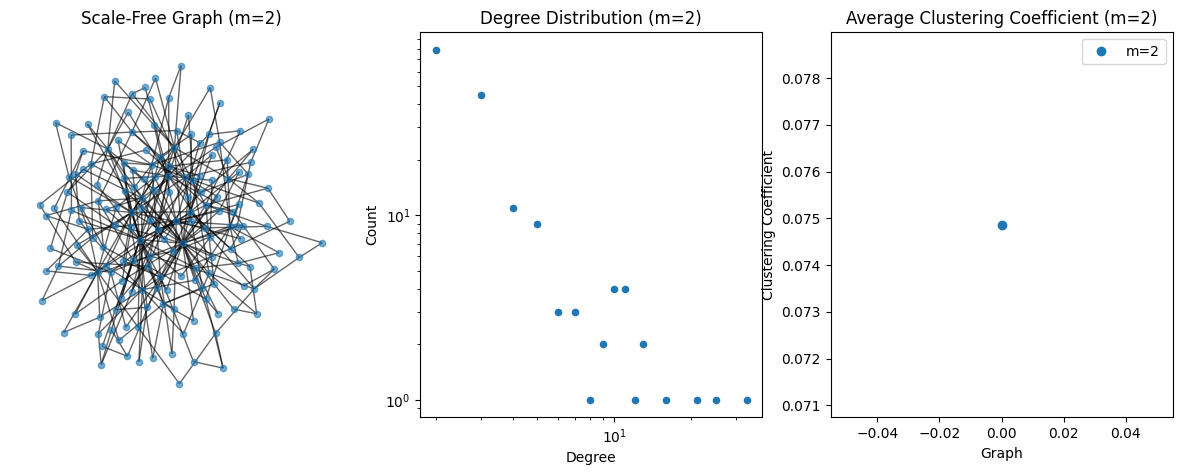

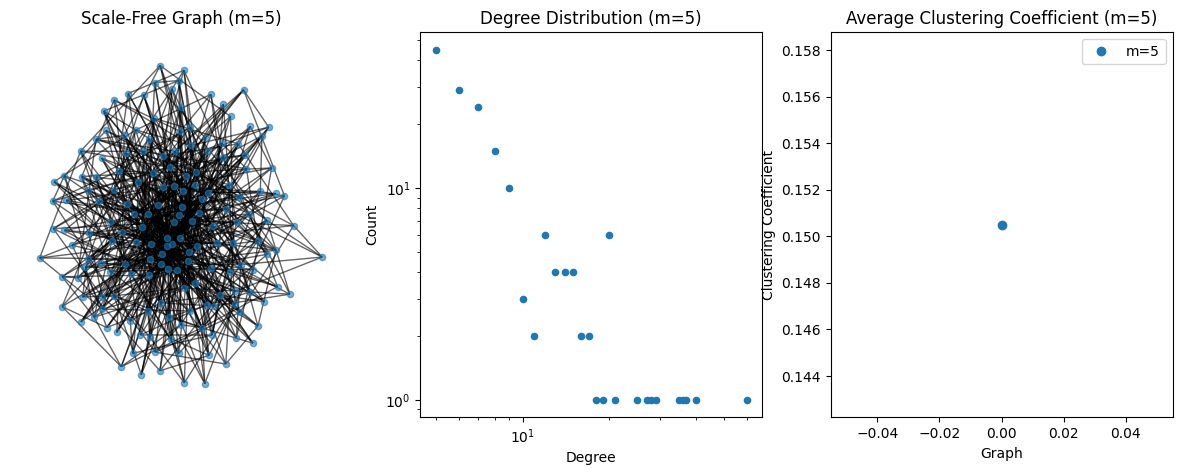

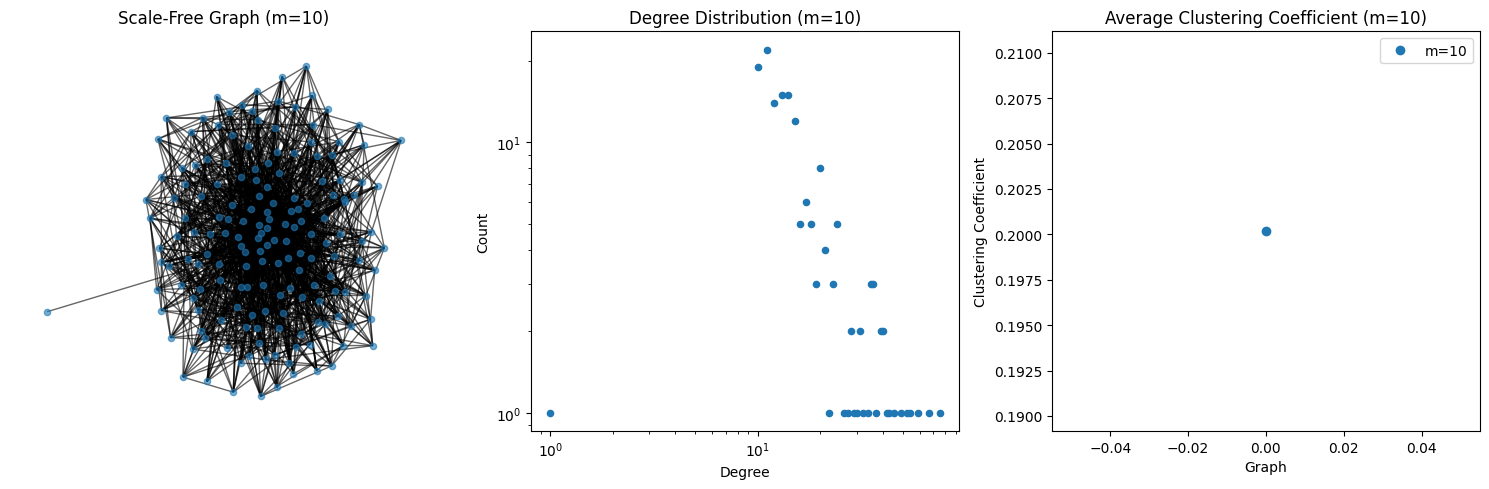

In [5]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

#Functions to :
def generate_scale_free_graph(num_nodes, m):
    # Generate the graph using the Barabási-Albert model
    graph = nx.barabasi_albert_graph(num_nodes, m)

    # Plot the graph structure
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    nx.draw(graph, node_size=20, with_labels=False, font_size=8, alpha=0.6)
    plt.title(f"Scale-Free Graph (m={m})", fontsize=12)

    # Plot the degree distribution
    plt.subplot(132)
    degree_sequence = [d for n, d in graph.degree()]
    degree_count = np.array(np.unique(degree_sequence, return_counts=True)).T
    print("degree distribution is ",np.array(degree_count))
    plt.scatter(degree_count[:, 0], degree_count[:, 1], s=20)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f"Degree Distribution (m={m})", fontsize=12)
    plt.xlabel("Degree", fontsize=10)
    plt.ylabel("Count", fontsize=10)

    # Plot the average clustering coefficient
    plt.subplot(133)
    avg_clustering_coefficient = nx.average_clustering(graph)
    plt.plot([avg_clustering_coefficient], 'o', label=f'm={m}')
    plt.title(f"Average Clustering Coefficient (m={m})", fontsize=12)
    plt.xlabel("Graph", fontsize=10)
    plt.ylabel("Clustering Coefficient", fontsize=10)
    plt.legend()

# Set the number of nodes in facebook graph
facebook_n = len(facebook_network.nodes())

print("===========================================================================================================================================")
# Generate scale-free graphs
generate_scale_free_graph(facebook_n, 2)
generate_scale_free_graph(facebook_n, 5)
generate_scale_free_graph(facebook_n, 10)

plt.tight_layout()
plt.show()

QUESTION C :

degree distribution is  [[ 3  1]
 [ 5 50]
 [ 6 28]
 [ 7 12]
 [ 8 17]
 [ 9  9]
 [10  9]
 [11  5]
 [12  5]
 [13  6]
 [14  3]
 [15  3]
 [16  2]
 [17  1]
 [18  2]
 [19  1]
 [20  1]
 [21  2]
 [25  1]
 [29  1]
 [30  3]
 [32  1]
 [37  2]
 [38  1]
 [39  1]
 [45  1]]
degree distribution is  [[ 5 50]
 [ 6 25]
 [ 7 18]
 [ 8 13]
 [ 9 12]
 [10  4]
 [11  9]
 [12  7]
 [13  3]
 [14  1]
 [15  4]
 [16  1]
 [17  5]
 [18  3]
 [20  1]
 [21  1]
 [22  2]
 [24  1]
 [25  1]
 [26  1]
 [30  1]
 [33  1]
 [37  1]
 [39  1]
 [47  1]
 [55  1]]
degree distribution is  [[ 1  1]
 [ 5 48]
 [ 6 29]
 [ 7 25]
 [ 8 13]
 [ 9  5]
 [10  6]
 [11  6]
 [12  3]
 [13  5]
 [14  1]
 [15  1]
 [16  2]
 [17  2]
 [18  4]
 [20  2]
 [21  2]
 [22  1]
 [23  1]
 [26  1]
 [27  2]
 [29  3]
 [33  1]
 [36  1]
 [44  1]
 [45  2]]
degree distribution is  [[10 23]
 [11 23]
 [12 16]
 [13 12]
 [14  9]
 [15 13]
 [16  7]
 [17 10]
 [18  5]
 [19  3]
 [20  2]
 [23  5]
 [24  3]
 [25  2]
 [26  2]
 [27  4]
 [28  3]
 [29  2]
 [31  4]
 [32  1]
 [33  1]
 [34  1]
 

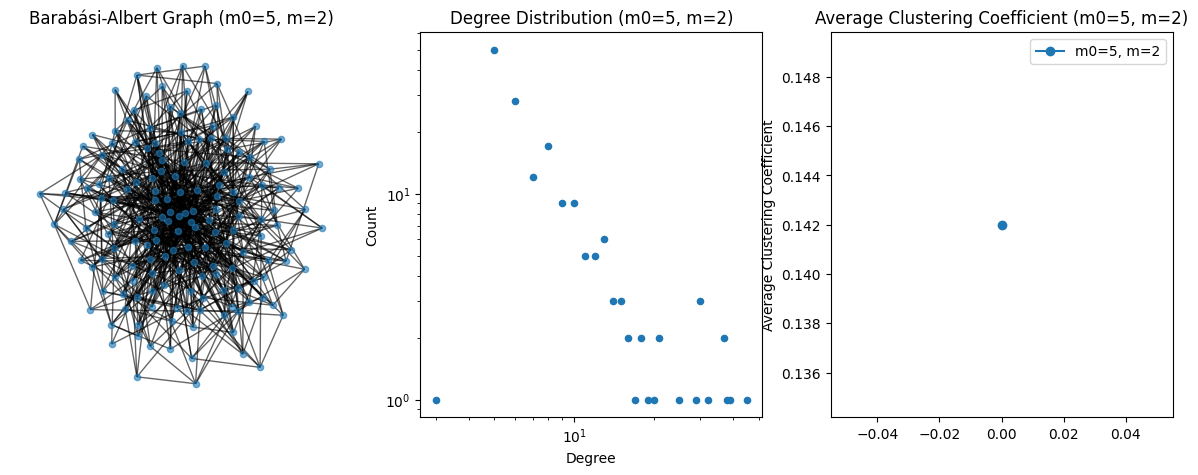

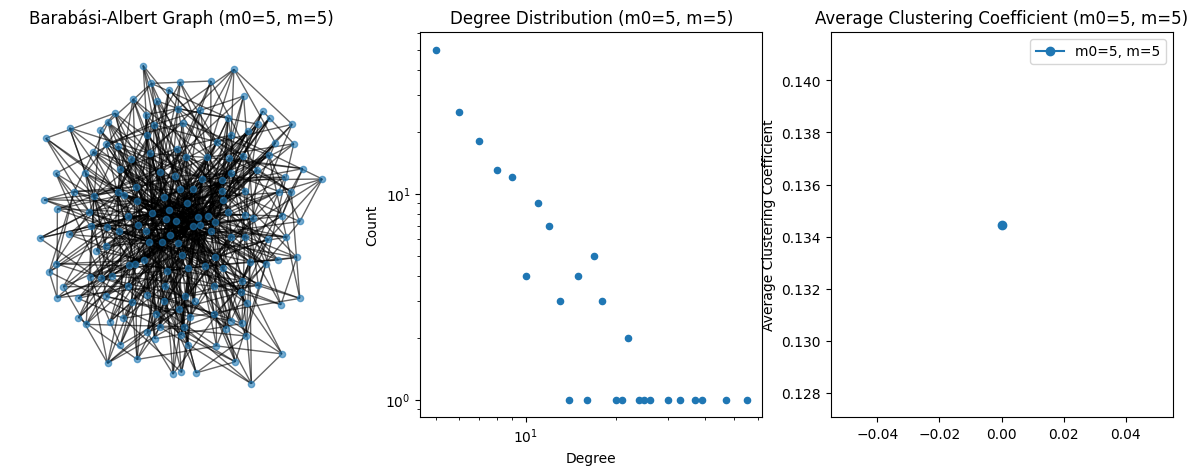

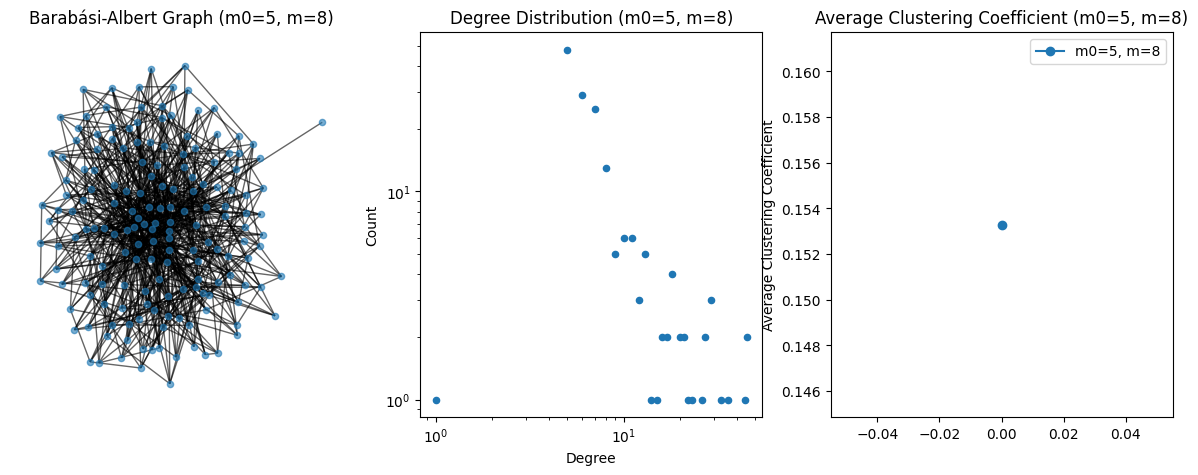

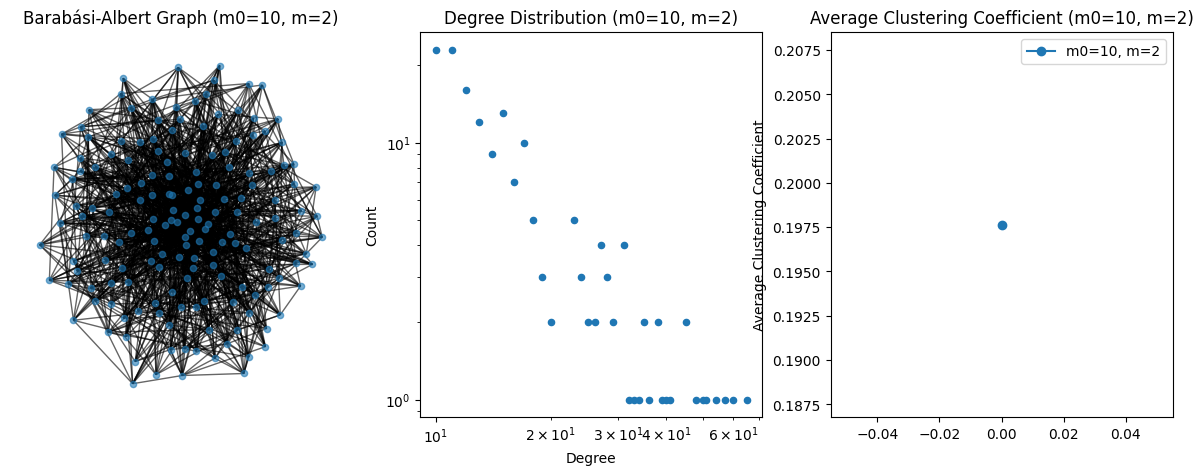

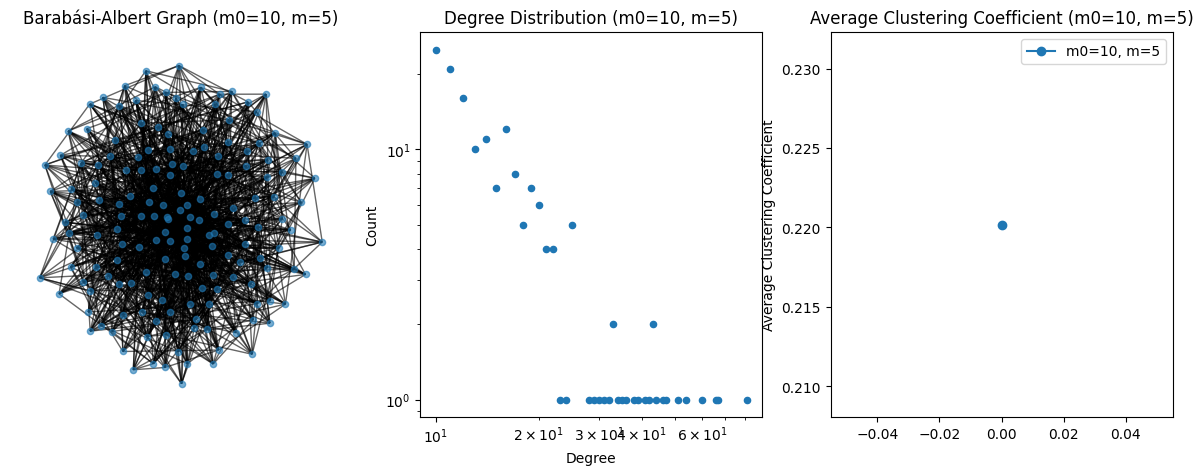

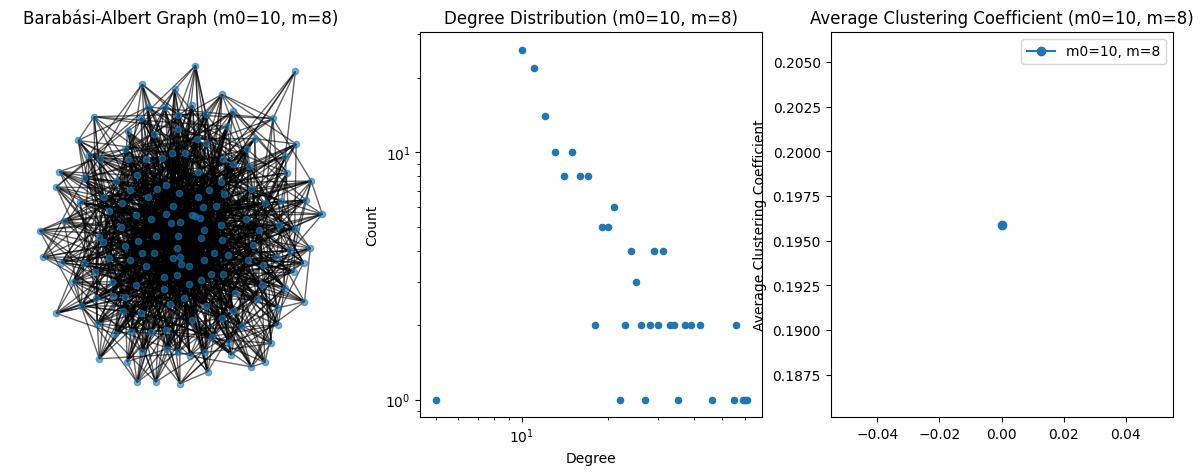

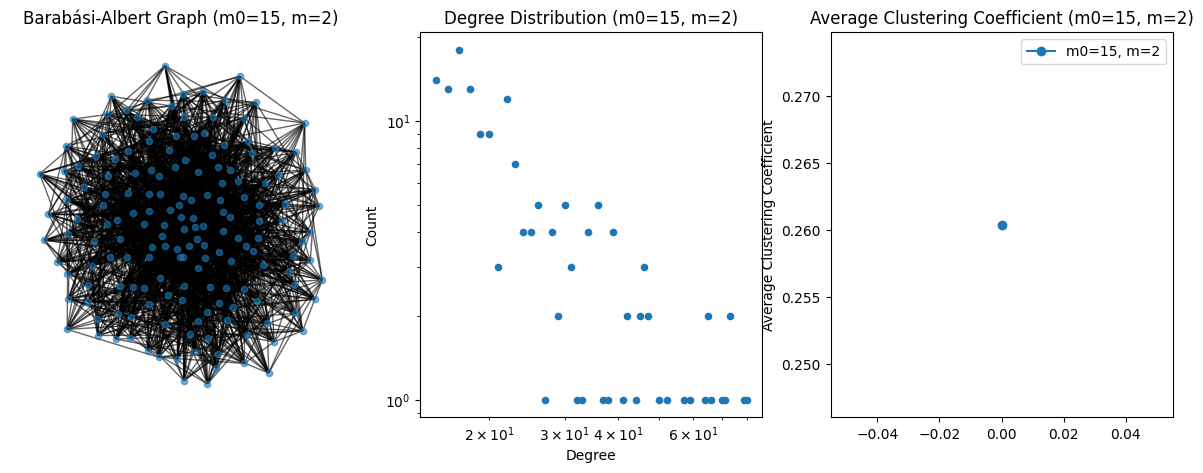

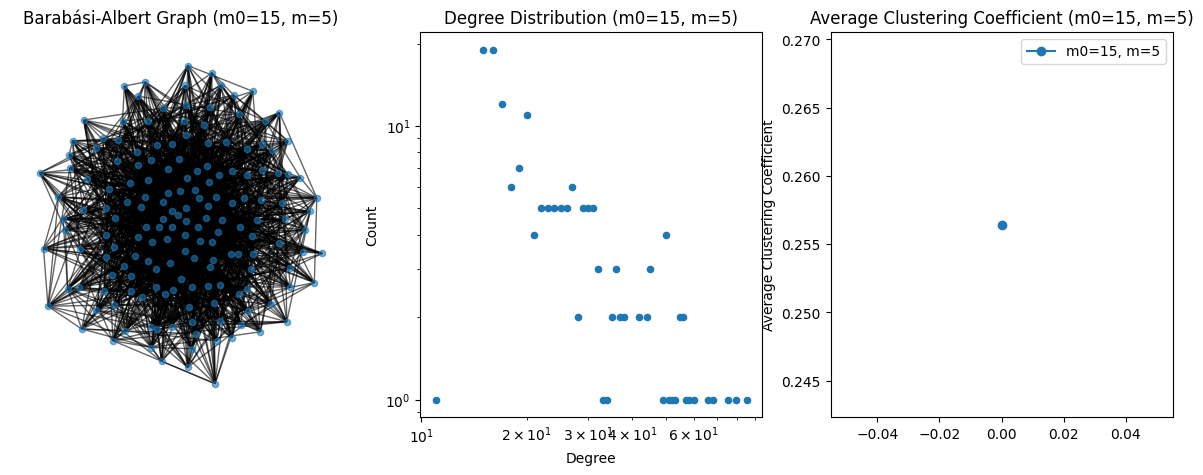

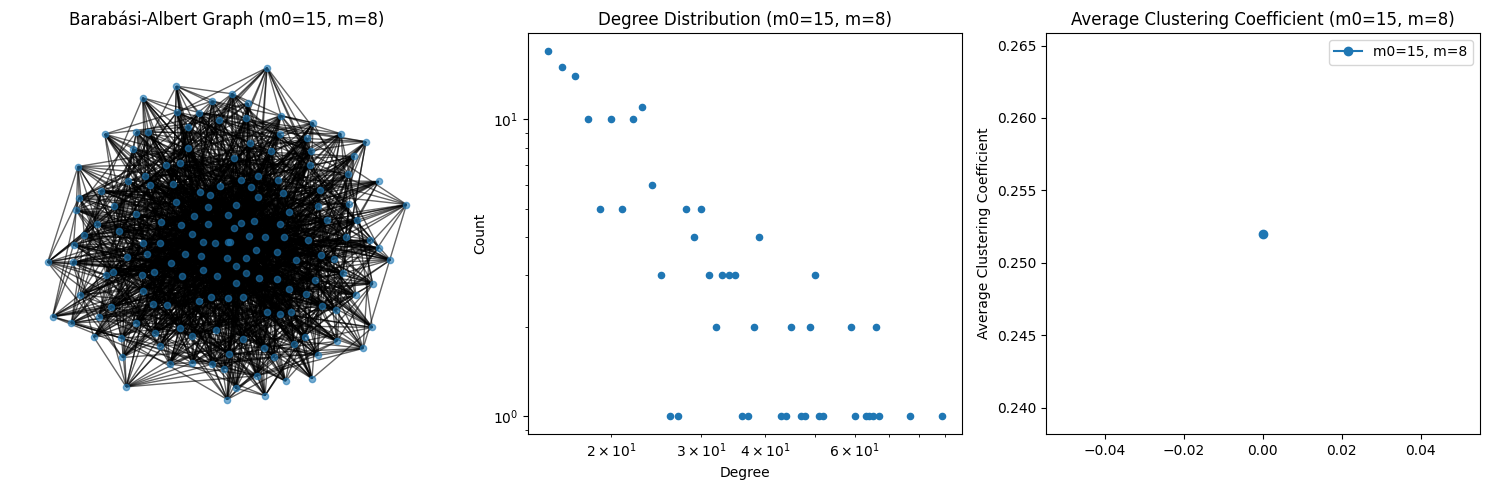

In [6]:
# Function to generate Barabási-Albert graphs and plot structures
def generate_barabasi_albert_graphs(num_nodes, m0_values, m_values, num_graphs_per_setting):
    for m0 in m0_values:
        for m in m_values:
            avg_clustering_coeffs = []  # To store average clustering coefficients for each graph
            for _ in range(num_graphs_per_setting):
                # Generate the graph using the Barabási-Albert model
                graph = nx.barabasi_albert_graph(num_nodes, m0, m)

                # Plot the graph structure
                plt.figure(figsize=(15, 5))
                plt.subplot(131)
                nx.draw(graph, node_size=20, with_labels=False, font_size=8, alpha=0.6)
                plt.title(f"Barabási-Albert Graph (m0={m0}, m={m})", fontsize=12)

                # Plot the degree distribution
                plt.subplot(132)
                degree_sequence = [d for n, d in graph.degree()]
                degree_count = np.array(np.unique(degree_sequence, return_counts=True)).T
                print("degree distribution is ",np.array(degree_count))
                plt.scatter(degree_count[:, 0], degree_count[:, 1], s=20)
                plt.xscale('log')
                plt.yscale('log')
                plt.title(f"Degree Distribution (m0={m0}, m={m})", fontsize=12)
                plt.xlabel("Degree", fontsize=10)
                plt.ylabel("Count", fontsize=10)

                # Plot the average clustering coefficient
                avg_clustering_coefficient = nx.average_clustering(graph)
                avg_clustering_coeffs.append(avg_clustering_coefficient)

                plt.subplot(133)
                plt.plot([avg_clustering_coefficient], 'o-', label=f'm0={m0}, m={m}')
                plt.title(f"Average Clustering Coefficient (m0={m0}, m={m})", fontsize=12)
                plt.ylabel("Average Clustering Coefficient", fontsize=10)
                plt.legend()

# Set the number of nodes in facebook graph
facebook_n = len(facebook_network.nodes())

print("===========================================================================================================================================")
# Generate Barabási-Albert graphs with the same number of nodes as Facebook-Ego
generate_barabasi_albert_graphs(facebook_n, [5, 10, 15], [2, 5, 8], num_graphs_per_setting=1)
plt.tight_layout()
plt.show()


QUESTION D :

Compare Facebook ego network and twitter ego network with randomly generated graphs.

In [8]:
print("""
In order to compare my Facebook-Ego network and Twitter-Ego network with the random graphs generated in (a), (b), and (c),
I considered the degree distribution and the clustering coefficient. The observations are as follows:

1. Facebook-Ego Network:
   - The degree distribution is diverse, with a wide range of node degrees.
   - Some nodes have high degrees, indicating the presence of central hubs.
   - The distribution is complex and does not follow a simple power-law.

2. Twitter-Ego Network:
   - Similar to Facebook, the degree distribution is heterogeneous, with varying node degrees.
   - There are high-degree nodes, pointing to the presence of important hubs.
   - The distribution is complex and structured.

3. Randomly Generated Graphs:
   - Graphs in (a):
     - The degree distribution is relatively uniform.
     - As node degree increases, there is a sharp decrease in node count.
     - The overall structure is more uniform compared to real networks.

   - Graphs in (b):
     - The degree distribution is more varied than in (a).
     - Some nodes have higher degrees, making the distribution less uniform.
     - It shows a mix of low and high-degree nodes, leading to a more heterogeneous structure.

   - Graphs in (c):
     - The degree distribution is more skewed, with fewer nodes having high degrees.
     - This attempts to mimic the heterogeneity of real networks, though it is less pronounced.

Comparison:
- Best Approximation:
  - Based on degree distributions, the graphs in (b) seem to best approximate the real networks, as they capture
    the heterogeneity and presence of high-degree nodes observed in Facebook and Twitter networks.

- Reasoning:
  - The mix of low and high-degree nodes in (b) is similar to the structure of real networks.
  - Graphs in (a) are too uniform, and those in (c) have fewer high-degree nodes, making them less accurate comparisons.
"""
)


In order to compare my Facebook-Ego network and Twitter-Ego network with the random graphs generated in (a), (b), and (c),
I considered the degree distribution and the clustering coefficient. The observations are as follows:

1. Facebook-Ego Network:
   - The degree distribution is diverse, with a wide range of node degrees.
   - Some nodes have high degrees, indicating the presence of central hubs.
   - The distribution is complex and does not follow a simple power-law.

2. Twitter-Ego Network:
   - Similar to Facebook, the degree distribution is heterogeneous, with varying node degrees.
   - There are high-degree nodes, pointing to the presence of important hubs.
   - The distribution is complex and structured.

3. Randomly Generated Graphs:
   - Graphs in (a):
     - The degree distribution is relatively uniform.
     - As node degree increases, there is a sharp decrease in node count.
     - The overall structure is more uniform compared to real networks.

   - Graphs in (b):
    